In [1]:
!pip install gdxpds


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt



In [3]:
%load_ext gams.magic
m = gams.exchange_container

In [4]:
gams.reset()
m = gams.exchange_container
df = pd.read_csv('FInalFoodData.csv', index_col="Item")
df 

,Description,Brand,Calories,Serving Size,Nutrients,Nov 2023 Price in Dollars,Percent Change from Nov 2022,Percent Change from Oct 2023
Item,,,,,,,,
chicken,CHICKEN,Keystone Brand Meats Inc,107.0 kcal,56.0 g,"Fatty acids, total trans: 0.0 g, Carbohydrate,...",0.12/oz,3.1,2.6
yogurt,YOGURT,Agri-Service LLC,94.0 kcal,170.0 ml,"Iron, Fe: 0.0 mg, Calcium, Ca: 118.0 mg, Fiber...",0.07/oz,NaN,NaN
cereal,CEREAL,"General Mills, Inc.",387.0 kcal,31.0 g,"Fatty acids, total polyunsaturated: 1.61 g, Ir...",0.27/oz,NaN,NaN
Corn,CORN,"Kcb Industries, L.L.C.",545.0 kcal,33.0 g,"Vitamin D (D2 + D3), International Units: 0.0 ...",0.17/oz,NaN,NaN
Potatoes,POTATOES,THE LITTLE POTATO COMPANY,74.0 kcal,148.0 g,"Iron, Fe: 0.73 mg, Cholesterol: 0.0 mg, Calciu...",0.05/oz,2.7,-2.8
...,...,...,...,...,...,...,...,...
Ice cream,ICE CREAM,"Clover Stornetta Farms, Inc.",205.0 kcal,88.0 g,"Energy: 205.0 kcal, Carbohydrate, by differenc...",0.17/oz,NaN,NaN
cookies,COOKIES,KNO,441.0 kcal,100.0 g,"Fiber, total dietary: 0.0 g, Sodium, Na: 0.0 m...",0.20/oz,NaN,NaN
brownies,BROWNIES,TWO-BITE,460.0 kcal,50.0 g,"Iron, Fe: 2.88 mg, Fiber, total dietary: 0.0 g...",0.34/oz,NaN,NaN


In [5]:
df['Calories'] = df['Calories'].str.extract('(\d+\.\d+)').astype(float)

In [6]:
df['Serving Size'] = df['Serving Size'].str.extract('(\d+\.\d+)').astype(float)

In [7]:
# Extract the numeric part of the 'Nov 2023 Price in Dollars' column and convert to float
df['Price'] = df['Nov 2023 Price in Dollars'].str.extract(r'(\d+\.\d+)').astype(float)

# Drop the original 'Nov 2023 Price in Dollars' column
df.drop('Nov 2023 Price in Dollars', axis=1, inplace=True)


In [8]:
def extract_nutrients(row):
    nutrients = {}
    items = re.split(', ', row['Nutrients'])
    for item in items:
        match = re.match(r'(.+?): (.+?) (.+)', item)
        if match:
            nutrient, value = match.groups()[:2]
            nutrients[nutrient] = float(value) if '.' in value else int(value)
    return pd.Series(nutrients)

# Apply the function to each row and concatenate the result with the original DataFrame
df = pd.concat([df, df.apply(extract_nutrients, axis=1)], axis=1)

# Drop the original 'Nutrients' column
df = df.drop('Nutrients', axis=1)

In [9]:
df.head()

,Description,Brand,Calories,Serving Size,Percent Change from Nov 2022,Percent Change from Oct 2023,Price,Alanine,Arginine,Ash,...,other,soluble,total,total ascorbic acid,total dietary,total including NLEA,total monounsaturated,total polyunsaturated,total saturated,total trans
Item,,,,,,,,,,,,,,,,,,,,,
chicken,CHICKEN,Keystone Brand Meats Inc,107.0,56.0,3.1,2.6,0.12,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.00,NaN,NaN,0.89,0.0
yogurt,YOGURT,Agri-Service LLC,94.0,170.0,NaN,NaN,0.07,NaN,NaN,NaN,...,NaN,NaN,NaN,0.7,0.0,15.88,NaN,NaN,1.76,NaN
cereal,CEREAL,"General Mills, Inc.",387.0,31.0,NaN,NaN,0.27,NaN,NaN,NaN,...,48.0,NaN,NaN,19.4,6.5,29.03,1.61,1.61,0.00,0.0
Corn,CORN,"Kcb Industries, L.L.C.",545.0,33.0,NaN,NaN,0.17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.1,24.24,NaN,NaN,4.55,0.0
Potatoes,POTATOES,THE LITTLE POTATO COMPANY,74.0,148.0,2.7,-2.8,0.05,NaN,NaN,NaN,...,NaN,NaN,NaN,2.4,2.0,0.68,NaN,NaN,0.00,0.0


In [10]:
df.rename(columns={'by difference': 'Carbs'}, inplace=True)
df.rename(columns={'Total lipid (fat)': 'Fat'}, inplace=True)
df.rename(columns={'Ca': 'Calcium'}, inplace=True)
df.rename(columns={'Vitamin D (D2 + D3)': 'Vitamin D'}, inplace=True)
df.rename(columns={'Serving Size': 'Serving'}, inplace=True)

In [11]:
df = df[["Calories", "Serving", 'Protein', "Carbs", "Fat", "Calcium", "Price"]]
df

,Calories,Serving,Protein,Carbs,Fat,Calcium,Price
Item,,,,,,,
chicken,107.0,56.0,21.43,0.00,1.79,0.0,0.12
yogurt,94.0,170.0,2.94,15.88,2.94,118.0,0.07
cereal,387.0,31.0,6.45,83.87,3.23,323.0,0.27
Corn,545.0,33.0,6.06,54.55,33.33,61.0,0.17
Potatoes,74.0,148.0,2.70,16.89,0.00,0.0,0.05
...,...,...,...,...,...,...,...
Ice cream,205.0,88.0,2.27,25.00,10.23,68.0,0.17
cookies,441.0,100.0,7.37,68.37,13.26,NaN,0.20
brownies,460.0,50.0,2.00,56.00,26.00,0.0,0.34


In [12]:
df_limited = df.head(10)

In [13]:
df.fillna(0, inplace=True)

In [14]:
df = df.drop(['Rice Krispies', 'chili', 'Cornbread', "Instant oatmeal", 'Cheese curds', 'Peanut butter and jelly sandwiches'])
# df = df.drop(['chili'])
# df = df.drop(['Cornbread', "Instant oatmeal"])
# df = df.drop(['Peanut butter and jelly sandwiches'])

In [15]:
foods = df.index.values.tolist()
foods

['chicken',
 'yogurt',
 'cereal',
 'Corn',
 'Potatoes',
 'Green beans',
 'Carrots',
 'Tomatoes',
 'Bell peppers',
 'Onions',
 'Lettuce',
 'Spinach',
 'Broccoli',
 'Cauliflower',
 'Cucumbers',
 'Zucchini',
 'Peas',
 'Brussels sprouts',
 'Apples',
 'Bananas',
 'Grapes',
 'Oranges',
 'Strawberries',
 'Blueberries',
 'Watermelon',
 'Pears',
 'Cherries',
 'Plums',
 'Cantaloupe',
 'Raspberries',
 'Blackberries',
 'Kiwi',
 'Popcorn',
 'Pretzels',
 'Trail mix',
 'Beef jerky',
 'Potato chips',
 'Granola bars',
 'Applesauce',
 'peanuts',
 'almonds',
 'Crackers',
 'Cheese slices',
 'Fruit cups',
 'marshmallows',
 'chocolate',
 'graham crackers',
 'Milk',
 'Cheese',
 'steaks',
 'burgers',
 'Pork (bacon, ham)',
 'Eggs',
 'Wheat bread',
 'Oatmeal',
 'Pancake mix',
 'Pasta',
 'Rice',
 'Peaches',
 'Instant noodles',
 'Frozen pizza',
 'mac and cheese',
 'Canned soups',
 'cream cheese',
 'Chips and salsa',
 'Fruit snacks',
 'dried fruits',
 'String cheese',
 'Protein bar',
 'Coffee',
 'tea',
 'Energy dr

In [16]:
meats = ['chicken', 'steaks', 'burgers', 'Pork (bacon, ham)']
fruits = ['Apples','Bananas','Grapes','Oranges','Strawberries','Blueberries','Watermelon','Pears','Cherries','Plums','Cantaloupe','Raspberries','Blackberries','Kiwi','Peaches']  
vegetables = ['Corn','Potatoes','Green beans','Carrots','Tomatoes','Bell peppers','Onions','Lettuce','Spinach','Broccoli','Cauliflower','Cucumbers','Zucchini','Peas','Brussels sprouts','Salads']        
breakfast = ['yogurt','cereal', 'Eggs', 'Oatmeal','Pancake mix', 'cream cheese','Toaster pastries','Frozen waffles']  
frozen = ['Frozen pizza', 'Pizza rolls','mozzarella sticks','frozen vegetables']
drinks = ['Coffee','tea','Energy drinks','sports drinks','Fruit juices','smoothies','Soda']
desserts = ['Ice cream','cookies','brownies', 'marshmallows','chocolate'] 
snacks = ['Popcorn','Pretzels','Trail mix','Beef jerky','Potato chips','Granola bars','Applesauce','peanuts','almonds','Crackers','Cheese slices','Fruit cups','graham crackers', "Hummus",'Chips and salsa','Fruit snacks','dried fruits',"String cheese",'Protein bar']
dry = ["pita bread", 'Instant noodles', "mac and cheese", 'Pasta','Rice', 'Wheat bread','Canned soups']   
dairy = ['Cheese slices', 'Milk','Cheese',]
    

In [17]:
len(meats) + len(fruits) + len(vegetables) + len(breakfast) + len(frozen) + len(drinks) + len(desserts) + len(snacks) + len(dry)

85

In [18]:
len(df)


87

In [19]:
leftovers = []
for i in foods:
    if i in meats:
        continue
    if i in fruits:
        continue
    if i in vegetables:
        continue
    if i in breakfast:
        continue
    if i in frozen:
        continue
    if i in drinks:
        continue
    if i in desserts:
        continue
    if i in snacks:
        continue
    if i in dry:
        continue
    if i in dairy:
        continue
    
leftovers

[]

In [20]:
import pandas as pd

# Assuming df is your original DataFrame
# Assuming meats, fruits, vegetables, etc. are lists containing food items of each type

# Create an empty dictionary to store DataFrames for each type of food
food_dict = {}

# Iterate through the food items in the original DataFrame
for i in df.index.values:
    if i in meats:
        if 'Meats' not in food_dict:
            food_dict['Meats'] = pd.DataFrame(columns=df.columns)
        food_dict['Meats'] = pd.concat([food_dict['Meats'], df.loc[[i]]])
    elif i in fruits:
        if 'Fruits' not in food_dict:
            food_dict['Fruits'] = pd.DataFrame(columns=df.columns)
        food_dict['Fruits'] = pd.concat([food_dict['Fruits'], df.loc[[i]]])
    elif i in vegetables:
        if 'Vegetables' not in food_dict:
            food_dict['Vegetables'] = pd.DataFrame(columns=df.columns)
        food_dict['Vegetables'] = pd.concat([food_dict['Vegetables'], df.loc[[i]]])
    elif i in breakfast:
        if 'Breakfast' not in food_dict:
            food_dict['Breakfast'] = pd.DataFrame(columns=df.columns)
        food_dict['Breakfast'] = pd.concat([food_dict['Breakfast'], df.loc[[i]]])
    elif i in frozen:
        if 'Frozen' not in food_dict:
            food_dict['Frozen'] = pd.DataFrame(columns=df.columns)
        food_dict['Frozen'] = pd.concat([food_dict['Frozen'], df.loc[[i]]])
    elif i in drinks:
        if 'Drinks' not in food_dict:
            food_dict['Drinks'] = pd.DataFrame(columns=df.columns)
        food_dict['Drinks'] = pd.concat([food_dict['Drinks'], df.loc[[i]]])
    elif i in desserts:
        if 'Desserts' not in food_dict:
            food_dict['Desserts'] = pd.DataFrame(columns=df.columns)
        food_dict['Desserts'] = pd.concat([food_dict['Desserts'], df.loc[[i]]])
    elif i in snacks:
        if 'Snacks' not in food_dict:
            food_dict['Snacks'] = pd.DataFrame(columns=df.columns)
        food_dict['Snacks'] = pd.concat([food_dict['Snacks'], df.loc[[i]]])
    elif i in dry:
        if 'Dry' not in food_dict:
            food_dict['Dry'] = pd.DataFrame(columns=df.columns)
        food_dict['Dry'] = pd.concat([food_dict['Dry'], df.loc[[i]]])
    elif i in dairy:
        if 'Dairy' not in food_dict:
            food_dict['Dairy'] = pd.DataFrame(columns=df.columns)
        food_dict['Dairy'] = pd.concat([food_dict['Dairy'], df.loc[[i]]])

# Now, the food_dict dictionary contains DataFrames for each type of food
# Access them like food_dict['Meats'], food_dict['Fruits'], etc.


In [21]:
food_dict

{'Meats':                    Calories  Serving  Protein  Carbs    Fat  Calcium  Price
 chicken               107.0     56.0    21.43   0.00   1.79      0.0   0.12
 steaks                  0.0      0.0    11.90   4.34   9.12     17.0   0.68
 burgers               252.0    151.0    17.22   0.00  19.87     20.0   0.40
 Pork (bacon, ham)       0.0      0.0     6.26  10.40   8.27     21.0   0.28,
 'Breakfast':                   Calories  Serving  Protein  Carbs    Fat  Calcium  Price
 yogurt                94.0    170.0     2.94  15.88   2.94    118.0   0.07
 cereal               387.0     31.0     6.45  83.87   3.23    323.0   0.27
 Eggs                 143.0     63.0    12.70   0.00   9.52     63.0   0.16
 Oatmeal              378.0     45.0    11.11  68.89   6.67     44.0   0.11
 Pancake mix          333.0     36.0     5.56  75.00   0.00      0.0   0.07
 cream cheese         321.0     28.0     7.14   7.14  32.14     71.0   0.17
 Toaster pastries     375.0    104.0     2.88  71.15   8.65 

In [22]:
meats_df = food_dict["Meats"]
fruits_df = food_dict["Fruits"] 
vegetables_df = food_dict["Vegetables"]
breakfast_df = food_dict['Breakfast'] 
frozen_df = food_dict["Frozen"]
drinks_df = food_dict["Drinks"]
desserts_df = food_dict["Desserts"]
snacks_df = food_dict["Snacks"]
dry_df = food_dict["Dry"]   
dairy_df = food_dict["Dairy"]

In [23]:
dairy_df
snacks_df

,Calories,Serving,Protein,Carbs,Fat,Calcium,Price
Popcorn,373.0,51.0,11.76000,72.55000,3.92,0.0,0.79
Pretzels,464.0,28.0,7.14000,64.29000,21.43,0.0,0.14
Trail mix,439.0,57.0,12.28000,52.63000,24.56,70.0,0.24
Beef jerky,0.0,0.0,33.20000,11.00000,25.60,20.0,0.55
Potato chips,530.0,0.0,3.53000,45.94000,35.34,0.0,0.59
Granola bars,429.0,35.0,5.71000,65.71000,14.29,57.0,0.17
Applesauce,79.0,126.0,0.00000,21.43000,0.00,0.0,0.07
peanuts,571.0,28.0,21.43000,21.43000,46.43,0.0,0.15
almonds,633.0,30.0,23.33000,13.33000,56.67,333.0,0.38
Crackers,500.0,14.0,14.29000,64.29000,21.43,71.0,0.19


In [24]:
# Item = m.addSet('Item',records=df_limited.index)
# p = m.addParameter('price',[Item],records=df_limited[["Price"]].to_numpy())
# cal = m.addParameter('calories',[Item],records=df_limited[["Calories"]].to_numpy())
# pro = m.addParameter('protein',[Item],records=df_limited[["Protein"]].to_numpy())
# carbs = m.addParameter('carbs',[Item],records=df_limited[["Carbs"]].to_numpy())
# fat = m.addParameter('fat',[Item],records=df_limited[["Fat"]].to_numpy())
# calcium = m.addParameter('calcium',[Item],records=df_limited[["Calcium"]].to_numpy())
# display(calcium.records)

In [25]:

# Define inflation rates
optimistic_rate = 0.015  # 1.5%
current_rate = 0.024    # 2.4%
less_optimistic_rate = 0.035  # 3.5%

# Function to apply inflation and create adjusted prices
def adjust_prices(df, inflation_rate):
    # Format the inflation rate as a percentage string
    rate_percent = f"{inflation_rate*100:.1f}%"  # Formats to one decimal place
    df[f'Price 2024 ({rate_percent})'] = df['Price'] * (1 + inflation_rate)
    return df

# Apply the function for each inflation rate
df = adjust_prices(df, optimistic_rate)
df = adjust_prices(df, current_rate)
df = adjust_prices(df, less_optimistic_rate)

# Print column names to verify
print(df.columns)

# Function to generate price distribution
def generate_price_distribution(price):
    np.random.seed(42)  # For reproducibility
    price_variation_factor = 0.05  # 5% variation for the distribution
    return np.random.normal(price, price * price_variation_factor, 1000)

# Apply the function to generate distributions for 2024 prices for each scenario
df['Price Distribution 2024 (Optimistic)'] = df['Price 2024 (1.5%)'].apply(generate_price_distribution)
df['Price Distribution 2024 (Current)'] = df['Price 2024 (2.4%)'].apply(generate_price_distribution)
df['Price Distribution 2024 (Less Optimistic)'] = df['Price 2024 (3.5%)'].apply(generate_price_distribution)
df

Index(['Calories', 'Serving', 'Protein', 'Carbs', 'Fat', 'Calcium', 'Price',
       'Price 2024 (1.5%)', 'Price 2024 (2.4%)', 'Price 2024 (3.5%)'],
      dtype='object')


,Calories,Serving,Protein,Carbs,Fat,Calcium,Price,Price 2024 (1.5%),Price 2024 (2.4%),Price 2024 (3.5%),Price Distribution 2024 (Optimistic),Price Distribution 2024 (Current),Price Distribution 2024 (Less Optimistic)
Item,,,,,,,,,,,,,
chicken,107.0,56.0,21.43,0.00,1.79,0.0,0.12,0.12180,0.12288,0.12420,"[0.12482498919183839, 0.12095797040586746, 0.1...","[0.12593181175610102, 0.12203050413360425, 0.1...","[0.12728459489019975, 0.12334137868972693, 0.1..."
yogurt,94.0,170.0,2.94,15.88,2.94,118.0,0.07,0.07105,0.07168,0.07245,"[0.0728145770285724, 0.07055881607008938, 0.07...","[0.07346022352439227, 0.07118446074460248, 0.0...","[0.0742493470192832, 0.07194913756900738, 0.07..."
cereal,387.0,31.0,6.45,83.87,3.23,323.0,0.27,0.27405,0.27648,0.27945,"[0.28085622568163643, 0.27215543341320186, 0.2...","[0.2833465764512273, 0.27456863430060957, 0.28...","[0.2863903385029494, 0.2775181020518856, 0.288..."
Corn,545.0,33.0,6.06,54.55,33.33,61.0,0.17,0.17255,0.17408,0.17595,"[0.17683540135510442, 0.1713571247416456, 0.17...","[0.1784033999878098, 0.17287654752260603, 0.17...","[0.18031984276111632, 0.1747336198104465, 0.18..."
Potatoes,74.0,148.0,2.70,16.89,0.00,0.0,0.05,0.05075,0.05120,0.05175,"[0.052010412163266, 0.050399154335778115, 0.05...","[0.052471588231708756, 0.05084604338900177, 0....","[0.05303524787091656, 0.05139224112071956, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ice cream,205.0,88.0,2.27,25.00,10.23,68.0,0.17,0.17255,0.17408,0.17595,"[0.17683540135510442, 0.1713571247416456, 0.17...","[0.1784033999878098, 0.17287654752260603, 0.17...","[0.18031984276111632, 0.1747336198104465, 0.18..."
cookies,441.0,100.0,7.37,68.37,13.26,0.0,0.20,0.20300,0.20480,0.20700,"[0.208041648653064, 0.20159661734311246, 0.209...","[0.20988635292683502, 0.20338417355600708, 0.2...","[0.21214099148366625, 0.20556896448287823, 0.2..."
brownies,460.0,50.0,2.00,56.00,26.00,0.0,0.34,0.34510,0.34816,0.35190,"[0.35367080271020884, 0.3427142494832912, 0.35...","[0.3568067999756196, 0.34575309504521207, 0.35...","[0.36063968552223263, 0.349467239620893, 0.363..."


In [26]:
Item = m.addSet('Item',records=df.index)
me = m.addSet("meat",domain = [Item],records=meats_df.index)
fruit = m.addSet("fruit",domain = [Item],records=fruits_df.index)
veg = m.addSet("vegetable",domain = [Item],records=vegetables_df.index)
bf = m.addSet("breakfast",domain = [Item],records=breakfast_df.index)
fr = m.addSet("frozen",domain = [Item],records=frozen_df.index)
dr = m.addSet("drink",domain = [Item],records=drinks_df.index)
de = m.addSet("dessert",domain = [Item],records=desserts_df.index)
snack = m.addSet("snack",domain = [Item],records=snacks_df.index)
dry = m.addSet("dry",domain = [Item],records=dry_df.index)
dairy = m.addSet("dairy",domain = [Item],records=dairy_df.index)
p = m.addParameter('price',[Item],records=df[["Price"]].to_numpy())
cal = m.addParameter('calories',[Item],records=df[["Calories"]].to_numpy())
pro = m.addParameter('protein',[Item],records=df[["Protein"]].to_numpy())
carbs = m.addParameter('carbs',[Item],records=df[["Carbs"]].to_numpy())
fat = m.addParameter('fat',[Item],records=df[["Fat"]].to_numpy())
calcium = m.addParameter('calcium',[Item],records=df[["Calcium"]].to_numpy())
price_1_5 = m.addParameter('price_1_5', [Item], records=df[["Price 2024 (1.5%)"]].to_numpy())
price_2_4 = m.addParameter('price_2_4', [Item], records=df[["Price 2024 (2.4%)"]].to_numpy())
price_3_5 = m.addParameter('price_3_5', [Item], records=df[["Price 2024 (3.5%)"]].to_numpy())

In [27]:
cost = m.addVariable('cost','free',description="total cost")
x = m.addVariable('x','integer',domain = Item,description="number of servings for each item")


In [28]:
%%gams
scalar
    requirements /3000/,
    time_multiplier /7/;
    
parameter 
    price_1_5(Item), price_2_4(Item), price_3_5(Item);

alias(Item, i);
    
equations
    obj "realistic"
    obj2 "pessimistic"
    obj3 "optimistic"
    cal_constraint_up
    cal_constraint_low
    protein_constraint_up
    protein_constraint_low
    carb_constraint_up
    carb_constraint_low
    fat_constraint_up
    fat_constraint_low
    calcium_constraint_up
    calcium_constraint_low
    cost_constraint
    cost_constraint_low
    meat_constraint_up
    meat_constraint_low
    fruit_constraint_up
    fruit_constraint_low
    veg_constraint_up
    veg_constraint_low
    breakfast_constraint_up
    breakfast_constraint_low
    frozen_constraint_up
    frozen_constraint_low
    drink_constraint_up
    drink_constraint_low
    dessert_constraint_up
    dessert_constraint_low
    snack_up
    snack_low
    dry_constraint_up
    dry_constraint_low
    dairy_constraint_up
    dairy_constraint_low;
    
obj..
    cost =e= sum(Item, price_2_4(Item)*x(Item));
    
obj2..
    cost =e= sum(Item, price_3_5(Item)*x(Item));
    
obj3..
    cost =e= sum(Item, price_1_5(Item)*x(Item));

# Do not go over budget
cost_constraint..
    cost =l= 150;
    
cost_constraint_low..
    cost =g= 70;

# Make sure we meet our nutritional goals
cal_constraint_up..
    sum(Item, x(Item) * calories(Item)) =l= 3000 * time_multiplier;  # Upper calorie limit
    
cal_constraint_low..
    sum(Item, x(Item) * calories(Item)) =g= 2500 * time_multiplier;  # Lower calorie limit
    
protein_constraint_up..
    sum(i, x(i) * protein(i)) =l= 56 * time_multiplier;  # Upper protein limit
    
protein_constraint_low..
    sum(i, x(i) * protein(i)) =g= 46 * time_multiplier;  # Lower protein limit
    
carb_constraint_up..
    sum(i, x(i) * carbs(i)) =l= 375 * time_multiplier;  # Upper carb limit
    
carb_constraint_low..
    sum(i, x(i) * carbs(i)) =g= 313 * time_multiplier;  # Lower carb limit
    
fat_constraint_up..
    sum(i, x(i) * fat(i)) =l= 100 * time_multiplier;  # Upper fat limit
    
fat_constraint_low..
    sum(i, x(i) * fat(i)) =g= 83 * time_multiplier;  # Lower fat limit
    
calcium_constraint_up..
    sum(i, x(i) * calcium(i)) =l= 1100 * time_multiplier;  # Upper calcium limit
    
calcium_constraint_low..
    sum(i, x(i) * calcium(i)) =g= 900 * time_multiplier;  # Lower calcium limit

    
# Make sure we diversify the food groups we are eating     
meat_constraint_up..
    sum(meat, calories(meat) * x(meat)) =l= 1000;
    
meat_constraint_low..
    sum(meat, calories(meat) * x(meat)) =g= 200;
    
fruit_constraint_up..
    sum(fruit, calories(fruit) * x(fruit)) =l= 1000;
    
fruit_constraint_low..
    sum(fruit, calories(fruit) * x(fruit)) =g= 100;
    
veg_constraint_up..
    sum(vegetable, calories(vegetable) * x(vegetable)) =l= 1000;
    
veg_constraint_low..
    sum(vegetable, calories(vegetable) * x(vegetable)) =g= 200;
    
breakfast_constraint_up..
    sum(breakfast, calories(breakfast) * x(breakfast)) =l= 500;
    
breakfast_constraint_low..
    sum(breakfast, calories(breakfast) * x(breakfast)) =g= 50;
    
frozen_constraint_up..
    sum(frozen, calories(frozen) * x(frozen)) =l= 100;
    
frozen_constraint_low..
    sum(frozen, calories(frozen) * x(frozen)) =g= 0;
    
drink_constraint_up..
    sum(drink, calories(drink) * x(drink)) =l= 50;
    
drink_constraint_low..
    sum(drink, calories(drink) * x(drink)) =g= 0;
    
dessert_constraint_up..
    sum(dessert, calories(dessert) * x(dessert)) =l= 50;
    
dessert_constraint_low..
    sum(dessert, calories(dessert) * x(dessert)) =g= 0;
    
snack_up..
    sum(snack, calories(snack) * x(snack)) =l= 100;
    
snack_low..
    sum(snack, calories(snack) * x(snack)) =g= 0;
    
dry_constraint_up..
    sum(dry, calories(dry) * x(dry)) =l= 250;
    
dry_constraint_low..
    sum(dry, calories(dry) * x(dry)) =g= 20;
    
dairy_constraint_up..
    sum(dairy, calories(dairy) * x(dairy)) =l= 150;
    
dairy_constraint_low..
    sum(dairy, calories(dairy) * x(dairy)) =g= 0;
    
# X cannot be negative
x.lo(i) = 0;
 
model plan /obj 
    cal_constraint_up
    cal_constraint_low
    protein_constraint_up
    protein_constraint_low
    carb_constraint_up
    carb_constraint_low
    fat_constraint_up
    fat_constraint_low
    calcium_constraint_up
    calcium_constraint_low
    cost_constraint
    cost_constraint_low
    meat_constraint_up
    meat_constraint_low
    fruit_constraint_up
    fruit_constraint_low
    veg_constraint_up
    veg_constraint_low
    breakfast_constraint_up
    breakfast_constraint_low
    frozen_constraint_up
    frozen_constraint_low
    drink_constraint_up
    drink_constraint_low
    dessert_constraint_up
    dessert_constraint_low
    snack_low
    dry_constraint_up
    dry_constraint_low
    dairy_constraint_up
    dairy_constraint_low
    /;
solve plan using mip minimizing cost;



,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Resource (3),Integer (8),70.0006,32,88,MIP,CPLEX,60.001


In [29]:
display(x.records[x.records["level"] !=0]) # Realistic

,Item,level,marginal,lower,upper,scale
1,yogurt,2.0,0.07168,0.0,inf,1.0
4,Potatoes,1.0,0.05120,0.0,inf,1.0
6,Carrots,19.0,0.54272,0.0,inf,1.0
9,Onions,2.0,0.07168,0.0,inf,1.0
14,Cucumbers,1.0,0.12288,0.0,inf,1.0
18,Apples,1.0,0.09216,0.0,inf,1.0
22,Strawberries,1.0,0.25600,0.0,inf,1.0
26,Cherries,10.0,0.21504,0.0,inf,1.0
27,Plums,1.0,0.33792,0.0,inf,1.0
36,Potato chips,6.0,0.60416,0.0,inf,1.0


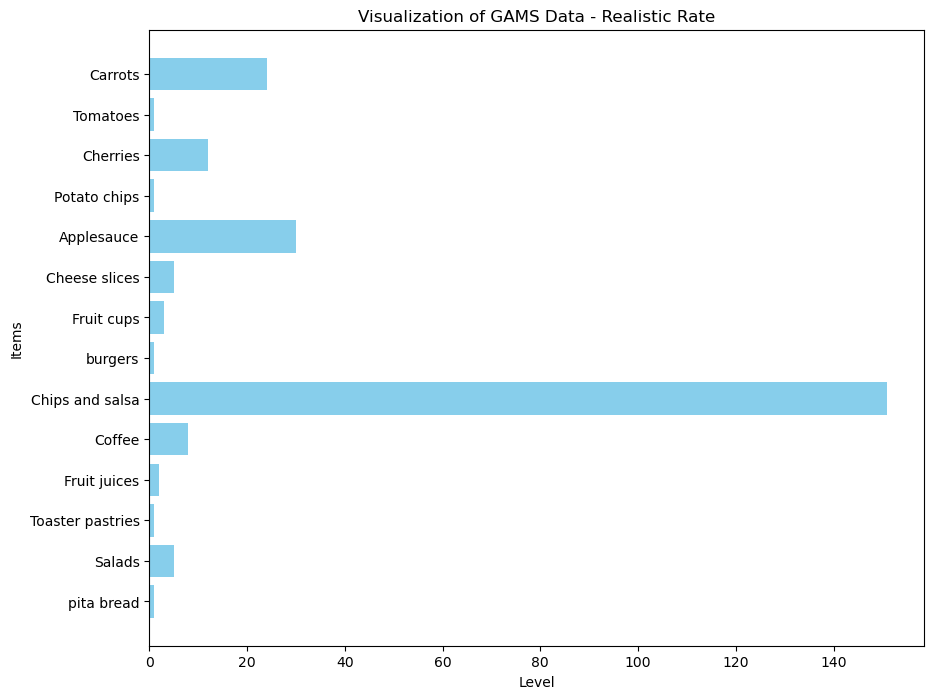

In [40]:
df_filtered = x.records[x.records['level'] != 0]

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(df_filtered['Item'], df_filtered['level'], color='skyblue')
plt.xlabel('Level')
plt.ylabel('Items')
plt.title('Visualization of GAMS Data - Realistic Rate')
plt.gca().invert_yaxis()  # Highest values at the top
plt.show()

In [42]:
%%gams
scalar
    requirements /3000/,
    time_multiplier /7/;
    
parameter 
    price_1_5(Item), price_2_4(Item), price_3_5(Item);

alias(Item, i);
    
equations
    obj "realistic"
    obj2 "pessimistic"
    obj3 "optimistic"
    cal_constraint_up
    cal_constraint_low
    protein_constraint_up
    protein_constraint_low
    carb_constraint_up
    carb_constraint_low
    fat_constraint_up
    fat_constraint_low
    calcium_constraint_up
    calcium_constraint_low
    cost_constraint
    cost_constraint_low
    meat_constraint_up
    meat_constraint_low
    fruit_constraint_up
    fruit_constraint_low
    veg_constraint_up
    veg_constraint_low
    breakfast_constraint_up
    breakfast_constraint_low
    frozen_constraint_up
    frozen_constraint_low
    drink_constraint_up
    drink_constraint_low
    dessert_constraint_up
    dessert_constraint_low
    snack_up
    snack_low
    dry_constraint_up
    dry_constraint_low
    dairy_constraint_up
    dairy_constraint_low;
    
obj..
    cost =e= sum(Item, price_2_4(Item)*x(Item));
    
obj2..
    cost =e= sum(Item, price_3_5(Item)*x(Item));
    
obj3..
    cost =e= sum(Item, price_1_5(Item)*x(Item));

# Do not go over budget
cost_constraint..
    cost =l= 150;
    
cost_constraint_low..
    cost =g= 30;

# Make sure we meet our nutritional goals
cal_constraint_up..
    sum(Item, x(Item) * calories(Item)) =l= 3000 * time_multiplier;  # Upper calorie limit
    
cal_constraint_low..
    sum(Item, x(Item) * calories(Item)) =g= 2500 * time_multiplier;  # Lower calorie limit
    
protein_constraint_up..
    sum(i, x(i) * protein(i)) =l= 56 * time_multiplier;  # Upper protein limit
    
protein_constraint_low..
    sum(i, x(i) * protein(i)) =g= 46 * time_multiplier;  # Lower protein limit
    
carb_constraint_up..
    sum(i, x(i) * carbs(i)) =l= 375 * time_multiplier;  # Upper carb limit
    
carb_constraint_low..
    sum(i, x(i) * carbs(i)) =g= 313 * time_multiplier;  # Lower carb limit
    
fat_constraint_up..
    sum(i, x(i) * fat(i)) =l= 100 * time_multiplier;  # Upper fat limit
    
fat_constraint_low..
    sum(i, x(i) * fat(i)) =g= 83 * time_multiplier;  # Lower fat limit
    
calcium_constraint_up..
    sum(i, x(i) * calcium(i)) =l= 1100 * time_multiplier;  # Upper calcium limit
    
calcium_constraint_low..
    sum(i, x(i) * calcium(i)) =g= 900 * time_multiplier;  # Lower calcium limit

    
# Make sure we diversify the food groups we are eating     
meat_constraint_up..
    sum(meat, calories(meat) * x(meat)) =l= 1000;
    
meat_constraint_low..
    sum(meat, calories(meat) * x(meat)) =g= 200;
    
fruit_constraint_up..
    sum(fruit, calories(fruit) * x(fruit)) =l= 1000;
    
fruit_constraint_low..
    sum(fruit, calories(fruit) * x(fruit)) =g= 100;
    
veg_constraint_up..
    sum(vegetable, calories(vegetable) * x(vegetable)) =l= 1000;
    
veg_constraint_low..
    sum(vegetable, calories(vegetable) * x(vegetable)) =g= 200;
    
breakfast_constraint_up..
    sum(breakfast, calories(breakfast) * x(breakfast)) =l= 500;
    
breakfast_constraint_low..
    sum(breakfast, calories(breakfast) * x(breakfast)) =g= 50;
    
frozen_constraint_up..
    sum(frozen, calories(frozen) * x(frozen)) =l= 100;
    
frozen_constraint_low..
    sum(frozen, calories(frozen) * x(frozen)) =g= 0;
    
drink_constraint_up..
    sum(drink, calories(drink) * x(drink)) =l= 50;
    
drink_constraint_low..
    sum(drink, calories(drink) * x(drink)) =g= 0;
    
dessert_constraint_up..
    sum(dessert, calories(dessert) * x(dessert)) =l= 50;
    
dessert_constraint_low..
    sum(dessert, calories(dessert) * x(dessert)) =g= 0;
    
snack_up..
    sum(snack, calories(snack) * x(snack)) =l= 100;
    
snack_low..
    sum(snack, calories(snack) * x(snack)) =g= 0;
    
dry_constraint_up..
    sum(dry, calories(dry) * x(dry)) =l= 250;
    
dry_constraint_low..
    sum(dry, calories(dry) * x(dry)) =g= 20;
    
dairy_constraint_up..
    sum(dairy, calories(dairy) * x(dairy)) =l= 150;
    
dairy_constraint_low..
    sum(dairy, calories(dairy) * x(dairy)) =g= 0;
    
# X cannot be negative
x.lo(i) = 0;
 
model plan /obj2 
    cal_constraint_up
    cal_constraint_low
    protein_constraint_up
    protein_constraint_low
    carb_constraint_up
    carb_constraint_low
    fat_constraint_up
    fat_constraint_low
    calcium_constraint_up
    calcium_constraint_low
    cost_constraint
    cost_constraint_low
    meat_constraint_up
    meat_constraint_low
    fruit_constraint_up
    fruit_constraint_low
    veg_constraint_up
    veg_constraint_low
    breakfast_constraint_up
    breakfast_constraint_low
    frozen_constraint_up
    frozen_constraint_low
    drink_constraint_up
    drink_constraint_low
    dessert_constraint_up
    dessert_constraint_low
    snack_low
    dry_constraint_up
    dry_constraint_low
    dairy_constraint_up
    dairy_constraint_low
    /;
solve plan using mip minimizing cost;


,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),Optimal Global (1),30.0047,32,88,MIP,CPLEX,0.011


In [43]:
display(x.records[x.records["level"] !=0]) #Pessimistic

,Item,level,marginal,lower,upper,scale
0,chicken,3.0,0.12420,0.0,inf,1.0
1,yogurt,4.0,0.07245,0.0,inf,1.0
4,Potatoes,3.0,0.05175,0.0,inf,1.0
26,Cherries,2.0,0.21735,0.0,inf,1.0
36,Potato chips,10.0,0.61065,0.0,inf,1.0
38,Applesauce,68.0,0.07245,0.0,inf,1.0
42,Cheese slices,8.0,0.50715,0.0,inf,1.0
43,Fruit cups,2.0,0.17595,0.0,inf,1.0
47,Milk,1.0,0.02070,0.0,inf,1.0
64,Chips and salsa,42.0,0.31050,0.0,inf,1.0


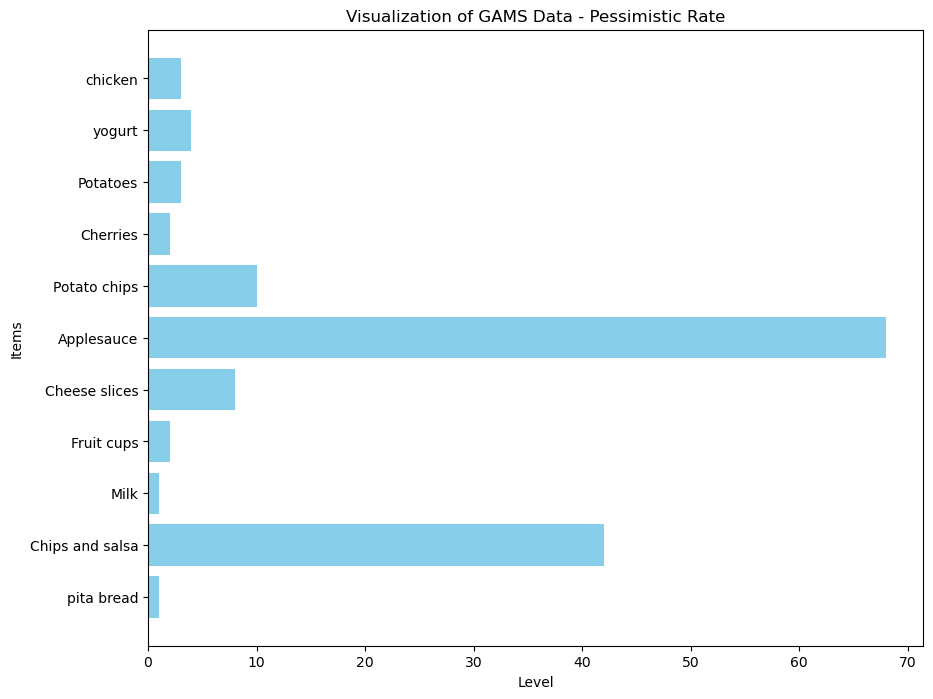

In [45]:
df_filtered = x.records[x.records['level'] != 0]

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(df_filtered['Item'], df_filtered['level'], color='skyblue')
plt.xlabel('Level')
plt.ylabel('Items')
plt.title('Visualization of GAMS Data - Pessimistic Rate')
plt.gca().invert_yaxis()  # Highest values at the top
plt.show()

In [54]:
%%gams
scalar
    requirements /3000/,
    time_multiplier /7/;
    
parameter 
    price_1_5(Item), price_2_4(Item), price_3_5(Item);

alias(Item, i);
    
equations
    obj "realistic"
    obj2 "pessimistic"
    obj3 "optimistic"
    cal_constraint_up
    cal_constraint_low
    protein_constraint_up
    protein_constraint_low
    carb_constraint_up
    carb_constraint_low
    fat_constraint_up
    fat_constraint_low
    calcium_constraint_up
    calcium_constraint_low
    cost_constraint
    cost_constraint_low
    meat_constraint_up
    meat_constraint_low
    fruit_constraint_up
    fruit_constraint_low
    veg_constraint_up
    veg_constraint_low
    breakfast_constraint_up
    breakfast_constraint_low
    frozen_constraint_up
    frozen_constraint_low
    drink_constraint_up
    drink_constraint_low
    dessert_constraint_up
    dessert_constraint_low
    snack_up
    snack_low
    dry_constraint_up
    dry_constraint_low
    dairy_constraint_up
    dairy_constraint_low;
    
obj..
    cost =e= sum(Item, price_2_4(Item)*x(Item));
    
obj2..
    cost =e= sum(Item, price_3_5(Item)*x(Item));
    
obj3..
    cost =e= sum(Item, price_1_5(Item)*x(Item));

# Do not go over budget
cost_constraint..
    cost =l= 150;
    
cost_constraint_low..
    cost =g= 80;

# Make sure we meet our nutritional goals
cal_constraint_up..
    sum(Item, x(Item) * calories(Item)) =l= 3000 * time_multiplier;  # Upper calorie limit
    
cal_constraint_low..
    sum(Item, x(Item) * calories(Item)) =g= 2500 * time_multiplier;  # Lower calorie limit
    
protein_constraint_up..
    sum(i, x(i) * protein(i)) =l= 56 * time_multiplier;  # Upper protein limit
    
protein_constraint_low..
    sum(i, x(i) * protein(i)) =g= 46 * time_multiplier;  # Lower protein limit
    
carb_constraint_up..
    sum(i, x(i) * carbs(i)) =l= 375 * time_multiplier;  # Upper carb limit
    
carb_constraint_low..
    sum(i, x(i) * carbs(i)) =g= 313 * time_multiplier;  # Lower carb limit
    
fat_constraint_up..
    sum(i, x(i) * fat(i)) =l= 100 * time_multiplier;  # Upper fat limit
    
fat_constraint_low..
    sum(i, x(i) * fat(i)) =g= 83 * time_multiplier;  # Lower fat limit
    
calcium_constraint_up..
    sum(i, x(i) * calcium(i)) =l= 1100 * time_multiplier;  # Upper calcium limit
    
calcium_constraint_low..
    sum(i, x(i) * calcium(i)) =g= 900 * time_multiplier;  # Lower calcium limit

    
# Make sure we diversify the food groups we are eating     
meat_constraint_up..
    sum(meat, calories(meat) * x(meat)) =l= 1500;
    
meat_constraint_low..
    sum(meat, calories(meat) * x(meat)) =g= 250;
    
fruit_constraint_up..
    sum(fruit, calories(fruit) * x(fruit)) =l= 1000;
    
fruit_constraint_low..
    sum(fruit, calories(fruit) * x(fruit)) =g= 100;
    
veg_constraint_up..
    sum(vegetable, calories(vegetable) * x(vegetable)) =l= 1000;
    
veg_constraint_low..
    sum(vegetable, calories(vegetable) * x(vegetable)) =g= 200;
    
breakfast_constraint_up..
    sum(breakfast, calories(breakfast) * x(breakfast)) =l= 500;
    
breakfast_constraint_low..
    sum(breakfast, calories(breakfast) * x(breakfast)) =g= 50;
    
frozen_constraint_up..
    sum(frozen, calories(frozen) * x(frozen)) =l= 100;
    
frozen_constraint_low..
    sum(frozen, calories(frozen) * x(frozen)) =g= 0;
    
drink_constraint_up..
    sum(drink, calories(drink) * x(drink)) =l= 50;
    
drink_constraint_low..
    sum(drink, calories(drink) * x(drink)) =g= 0;
    
dessert_constraint_up..
    sum(dessert, calories(dessert) * x(dessert)) =l= 50;
    
dessert_constraint_low..
    sum(dessert, calories(dessert) * x(dessert)) =g= 0;
    
snack_up..
    sum(snack, calories(snack) * x(snack)) =l= 100;
    
snack_low..
    sum(snack, calories(snack) * x(snack)) =g= 0;
    
dry_constraint_up..
    sum(dry, calories(dry) * x(dry)) =l= 250;
    
dry_constraint_low..
    sum(dry, calories(dry) * x(dry)) =g= 20;
    
dairy_constraint_up..
    sum(dairy, calories(dairy) * x(dairy)) =l= 150;
    
dairy_constraint_low..
    sum(dairy, calories(dairy) * x(dairy)) =g= 0;
    
# X cannot be negative
x.lo(i) = 0;
 
model plan /obj3 
    cal_constraint_up
    cal_constraint_low
    protein_constraint_up
    protein_constraint_low
    carb_constraint_up
    carb_constraint_low
    fat_constraint_up
    fat_constraint_low
    calcium_constraint_up
    calcium_constraint_low
    cost_constraint
    cost_constraint_low
    meat_constraint_up
    meat_constraint_low
    fruit_constraint_up
    fruit_constraint_low
    veg_constraint_up
    veg_constraint_low
    breakfast_constraint_up
    breakfast_constraint_low
    frozen_constraint_up
    frozen_constraint_low
    drink_constraint_up
    drink_constraint_low
    dessert_constraint_up
    dessert_constraint_low
    snack_low
    dry_constraint_up
    dry_constraint_low
    dairy_constraint_up
    dairy_constraint_low
    /;
solve plan using mip minimizing cost;


,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),Optimal Global (1),80.0023,32,88,MIP,CPLEX,2.549


In [55]:
display(x.records[x.records["level"] !=0]) # Optimistic

,Item,level,marginal,lower,upper,scale
1,yogurt,5.0,0.07105,0.0,inf,1.0
6,Carrots,22.0,0.53795,0.0,inf,1.0
10,Lettuce,3.0,0.09135,0.0,inf,1.0
11,Spinach,2.0,0.31465,0.0,inf,1.0
12,Broccoli,1.0,0.10150,0.0,inf,1.0
14,Cucumbers,1.0,0.12180,0.0,inf,1.0
15,Zucchini,1.0,0.09135,0.0,inf,1.0
21,Oranges,18.0,0.10150,0.0,inf,1.0
22,Strawberries,1.0,0.25375,0.0,inf,1.0
28,Cantaloupe,1.0,0.26390,0.0,inf,1.0


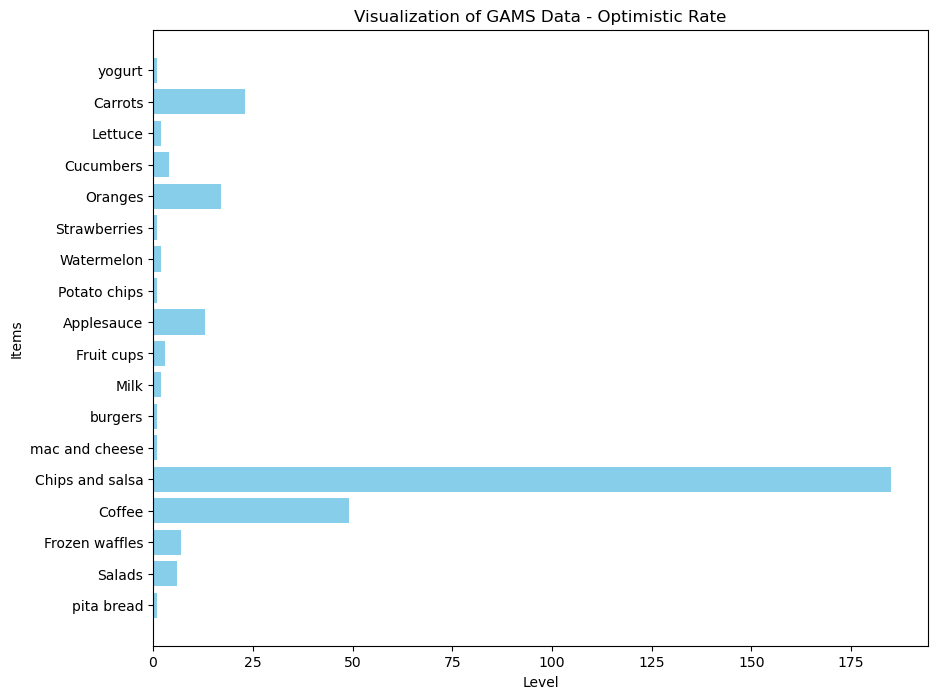

In [51]:
df_filtered = x.records[x.records['level'] != 0]

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(df_filtered['Item'], df_filtered['level'], color='skyblue')
plt.xlabel('Level')
plt.ylabel('Items')
plt.title('Visualization of GAMS Data - Optimistic Rate')
plt.gca().invert_yaxis()  # Highest values at the top
plt.show()